<a href="https://colab.research.google.com/github/rubyvanrooyen/notebooks/blob/main/getting_started/image_from_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Antenna Position Measurement

Tim Molteno (2018-2019)   
tim@elec.ac.nz

Simple script demonstrate how to image from raw data

Requires:
  * tart python package to be installed (sudo pip3 install tart)
  * raw data HDF file downloaded from the telescope web front end

Usage:
  `python3 image_from_raw.py --file  ~/Downloads/data_2019-07-24_22_47_14.353231.hdf`

## Installation

In [1]:
!pip install --upgrade pip wheel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [2]:
!pip install tart tart-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 47.3 MB/s eta 0:00:00


In [3]:
#@title ## Acquire data from the TART telescope.
#@markdown Telescope API URL
API_SERVER = "https://tart.elec.ac.nz/signal" #@param {type:"string"

In [4]:
# The raw data data file: data_2022-10-18_14_00_16.997874.hdf
from google.colab import files
files.upload()

Saving data_2022-10-18_14_00_16.997874.hdf to data_2022-10-18_14_00_16.997874.hdf


{'data_2022-10-18_14_00_16.997874.hdf': b'\x89HDF\r\n\x1a\n\x00\x00\x00\x00\x00\x08\x08\x00\x04\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff \x18\x03\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x88\x00\x00\x00\x00\x00\x00\x00\xa8\x02\x00\x00\x00\x00\x00\x00\x01\x00\x01\x00\x01\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x00\x11\x00\x10\x00\x00\x00\x00\x00\x88\x00\x00\x00\x00\x00\x00\x00\xa8\x02\x00\x00\x00\x00\x00\x00TREE\x00\x00\x01\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x000\x04\x00\x00\x00\x00\x00\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

## Script

In [5]:
import numpy as np
import numpy.fft as fft

import matplotlib.pyplot as plt

from tart.operation import observation
from tart.imaging import correlator
from tart.util import constants

from tart_tools import api_handler

### Step 0. Use the API to get information

In [6]:
api = api_handler.APIhandler(API_SERVER)

ant_pos = np.array(api.get('imaging/antenna_positions'))

calibration_gains = api.get('calibration/gain')
gains = np.array(calibration_gains['gain'])
phases = np.array(calibration_gains['phase_offset'])

### Step 1. Correlate the data

In [8]:
# Load the Observation file
filename="data_2022-10-18_14_00_16.997874.hdf"
obs = observation.Observation_Load(filename)

corr = correlator.Correlator()
vis = corr.correlate(obs)

print("Timestamp: {}".format(vis.timestamp))
print("Config: {}".format(vis.config.Dict))
print("Baselines: {}".format(vis.baselines))
print("visibilities: {}".format(vis.v))

baselines = np.asarray(vis.baselines)
v_arr = np.asarray(vis.v)

Timestamp: 2022-10-18 14:00:16.997874+00:00
Config: {'name': 'Signal Hill - Dunedin', 'frequency': 1575420000.0, 'L0_frequency': 1571328000.0, 'baseband_frequency': 4092000.0, 'sampling_frequency': 16368000.0, 'bandwidth': 2500000.0, 'lat': -45.85177, 'lon': 170.5456, 'alt': 270.0, 'num_antenna': 24, 'orientation': 0.0, 'axes': ['East', 'North', 'Up']}
Baselines: [[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [0, 14], [0, 15], [0, 16], [0, 17], [0, 18], [0, 19], [0, 20], [0, 21], [0, 22], [0, 23], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14], [1, 15], [1, 16], [1, 17], [1, 18], [1, 19], [1, 20], [1, 21], [1, 22], [1, 23], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 11], [2, 12], [2, 13], [2, 14], [2, 15], [2, 16], [2, 17], [2, 18], [2, 19], [2, 20], [2, 21], [2, 22], [2, 23], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [3, 11

### Step 2. Apply the calibration gains and phases

In [9]:
## Multiply the visiblities by the complex gains
bl = baselines
vis_l = v_arr * gains[bl[:,0]] * gains[bl[:,1]] * np.exp(-1j*(phases[bl[:,0]]-phases[bl[:,1]]))

### Step 3. Perform the inverse FFT imaging.

In [10]:
num_bin = 2**9  # Image resolution
nw=num_bin/4

bl_pos = ant_pos[baselines]
uu_a, vv_a, ww_a = (bl_pos[:,0] - bl_pos[:,1]).T/constants.L1_WAVELENGTH

# Grid the visibilities in the UV plane.
uu_edges = np.linspace(-nw, nw, num_bin+1)
vv_edges = np.linspace(-nw, nw, num_bin+1)

uv_plane = np.zeros((num_bin, num_bin), dtype=np.complex64)
uu_comb = np.concatenate((uu_a, -uu_a))
vv_comb = np.concatenate((vv_a, -vv_a))
all_v     = np.concatenate((vis_l, np.conjugate(vis_l)))
h_real,_,_ = np.histogram2d(vv_comb, uu_comb, weights = all_v.real, bins=[vv_edges, uu_edges])
h_imag,_,_ = np.histogram2d(vv_comb, uu_comb, weights = all_v.imag, bins=[vv_edges, uu_edges])
num_entries,_,_ = np.histogram2d(vv_comb, uu_comb, bins=[vv_edges, uu_edges])
uv_plane[:,:] = (h_real+(1j*h_imag))
pos = np.where(num_entries.__gt__(1))
uv_plane[pos] /= num_entries[pos]

cal_ift = np.fft.fftshift(fft.ifft2(np.fft.ifftshift(uv_plane)))

# Take the absolute value to make an intensity image
img = np.abs(cal_ift)
# Scale it to multiples of the image standard deviation
img /= np.std(img)

### Step 4. Plot the image.

Dynamic Range: 11.787803676617722


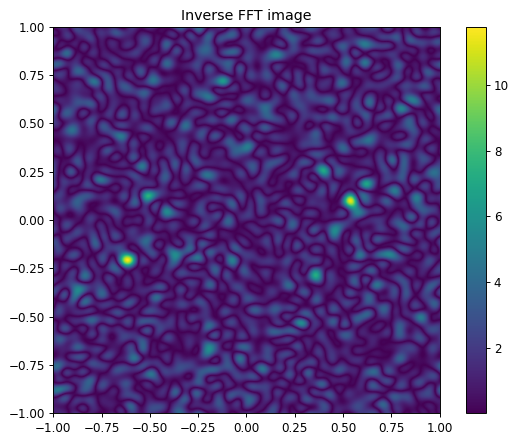

In [11]:
plt.figure(figsize=(8, 6), dpi=num_bin/6)
plt.title("Inverse FFT image")

print("Dynamic Range: {}".format(np.max(img)))

plt.imshow(img, extent=[-1, 1, -1, 1])

plt.xlim(-1, 1)
plt.ylim(-1, 1)
cb = plt.colorbar()
plt.savefig('raw_image.jpg')
plt.show()